In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
""" for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 """
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier ,plot_tree
iris = load_iris()
X = iris.data[:,2:]
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42,criterion="entropy")
tree_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

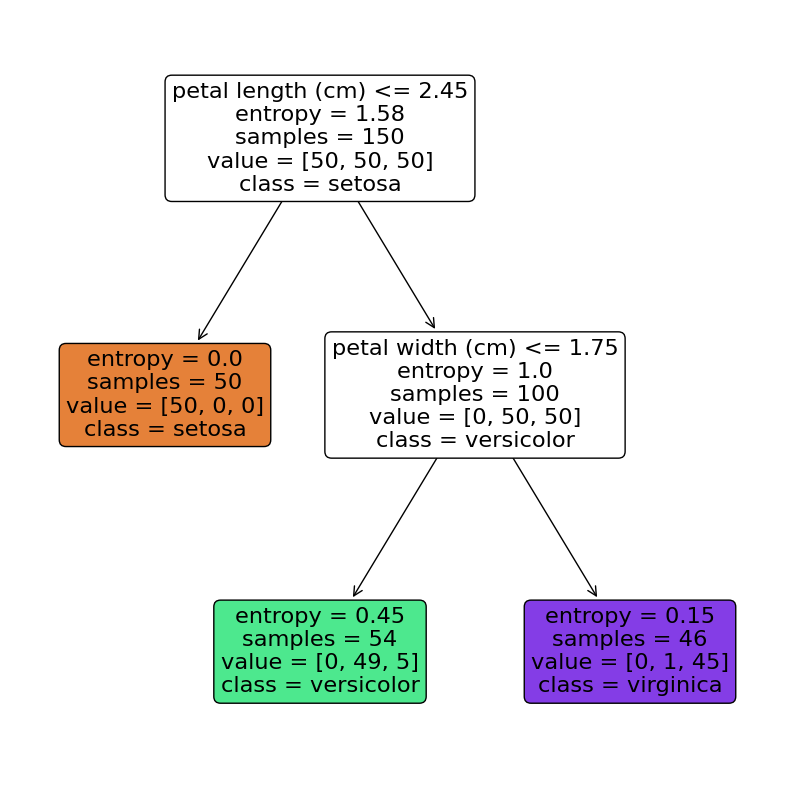

In [4]:
fig,ax = plt.subplots(figsize=(10,10))
plot_tree(tree_clf,feature_names=iris.feature_names[2:],
        class_names=iris.target_names,ax=ax,
        rounded=True,filled=True,precision=2)
plt.show()

In [5]:
from sklearn.tree import DecisionTreeRegressor
tree_reg =DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [6]:
adult_df = pd.read_csv("adult.csv")
adult_df =adult_df.drop_duplicates(keep='first')

In [7]:
adult_df["workclass"]=adult_df["workclass"].replace("?",np.nan)
adult_df["occupation"]=adult_df["occupation"].replace("?",np.nan)
adult_df["native.country"]=adult_df["native.country"].replace("?",np.nan)

In [8]:
adult_df['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32537, dtype: object

In [9]:
adult_df["workclass"]=adult_df["workclass"].fillna(adult_df["workclass"].mode()[0])
adult_df["occupation"]=adult_df["occupation"].fillna(adult_df["occupation"].mode()[0])
adult_df["native.country"]=adult_df["native.country"].fillna(adult_df["native.country"].mode()[0])

In [10]:
adult_df['native.country'].mode()

0    United-States
Name: native.country, dtype: object

In [11]:
adult_df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


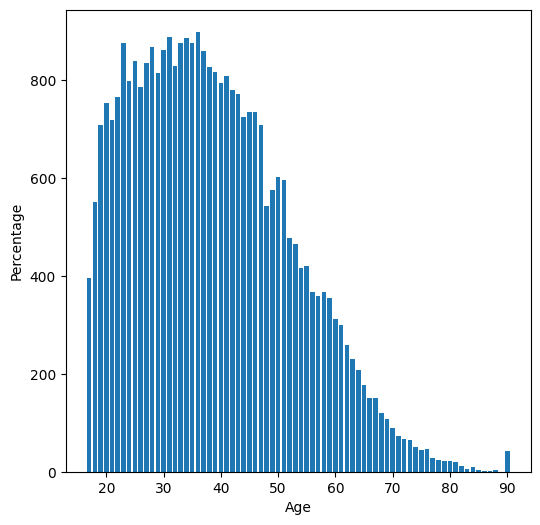

In [12]:
cols = adult_df.select_dtypes(exclude = 'object').columns
x = adult_df['age'].value_counts()
x.index
x.values
size = len(adult_df.index)
fig = plt.figure(figsize=(6,6))
plt.bar(x.index,x.values)
plt.xlabel('Age')
plt.ylabel('Percentage')
print(adult_df['age'].describe())

In [13]:
adult_df['income'].replace(['<=50K','>50K'],[0,100],inplace=True)

In [14]:
cols = adult_df.select_dtypes(exclude = 'object').columns
cols

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [15]:
adult_df[cols].corr('pearson')['income'].sort_values(ascending=False)

income            1.000000
education.num     0.335272
age               0.234037
hours.per.week    0.229658
capital.gain      0.223336
capital.loss      0.150501
fnlwgt           -0.009502
Name: income, dtype: float64

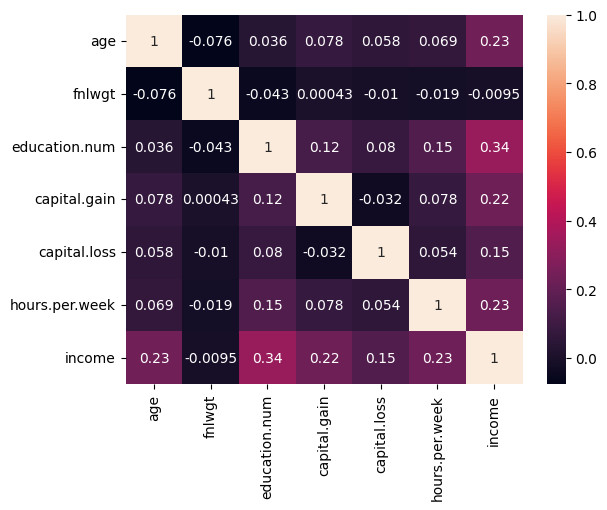

In [16]:
sn.heatmap(adult_df[cols].corr('pearson'),annot=True)
plt.show()

In [17]:
adult_df['occupation'].value_counts()

occupation
Prof-specialty       5979
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [18]:
Prof_specialty_df =adult_df.loc[adult_df['occupation'] =='Prof-specialty',['age','income','education']]
Prof_specialty_df['income'].value_counts()

income
0      3930
100    2049
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Crie uma instância do LabelEncoder
encoder = LabelEncoder()

In [20]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split
X = adult_df.drop(['income','education.num','fnlwgt'],axis=1)
#profissao
prof = X['occupation']
prof_number= encoder.fit_transform(prof)
X['occupation'] = prof_number
#trabalho
workclass = X['workclass']
workclass_encoder = LabelEncoder()
X['workclass']=workclass_encoder.fit_transform(workclass)
#estado civil
estado_civil_encoder= LabelEncoder() 
X['marital.status'] = estado_civil_encoder.fit_transform(X['marital.status'])
#relacionamento
relacionamento_encoder = LabelEncoder()
X['relationship'] = relacionamento_encoder.fit_transform(X['relationship'])
#etnia
etina_encoder = LabelEncoder()
X['race']=etina_encoder.fit_transform(X['race'])
#genero
genero_encoder = LabelEncoder()
X['sex']=genero_encoder.fit_transform(X['sex'])
#nacionalidade
nacionalidade_encoder =LabelEncoder()
X['native.country'] = nacionalidade_encoder.fit_transform(X['native.country'])
#educação
educacao_encoder = LabelEncoder()
X['education'] = educacao_encoder.fit_transform(X['education'])
y = pd.DataFrame(data=adult_df['income'],columns=['income'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [23]:
tree_clf_income = DecisionTreeClassifier(max_depth=3,random_state=42,criterion='entropy',splitter='best')
tree_clf_income.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

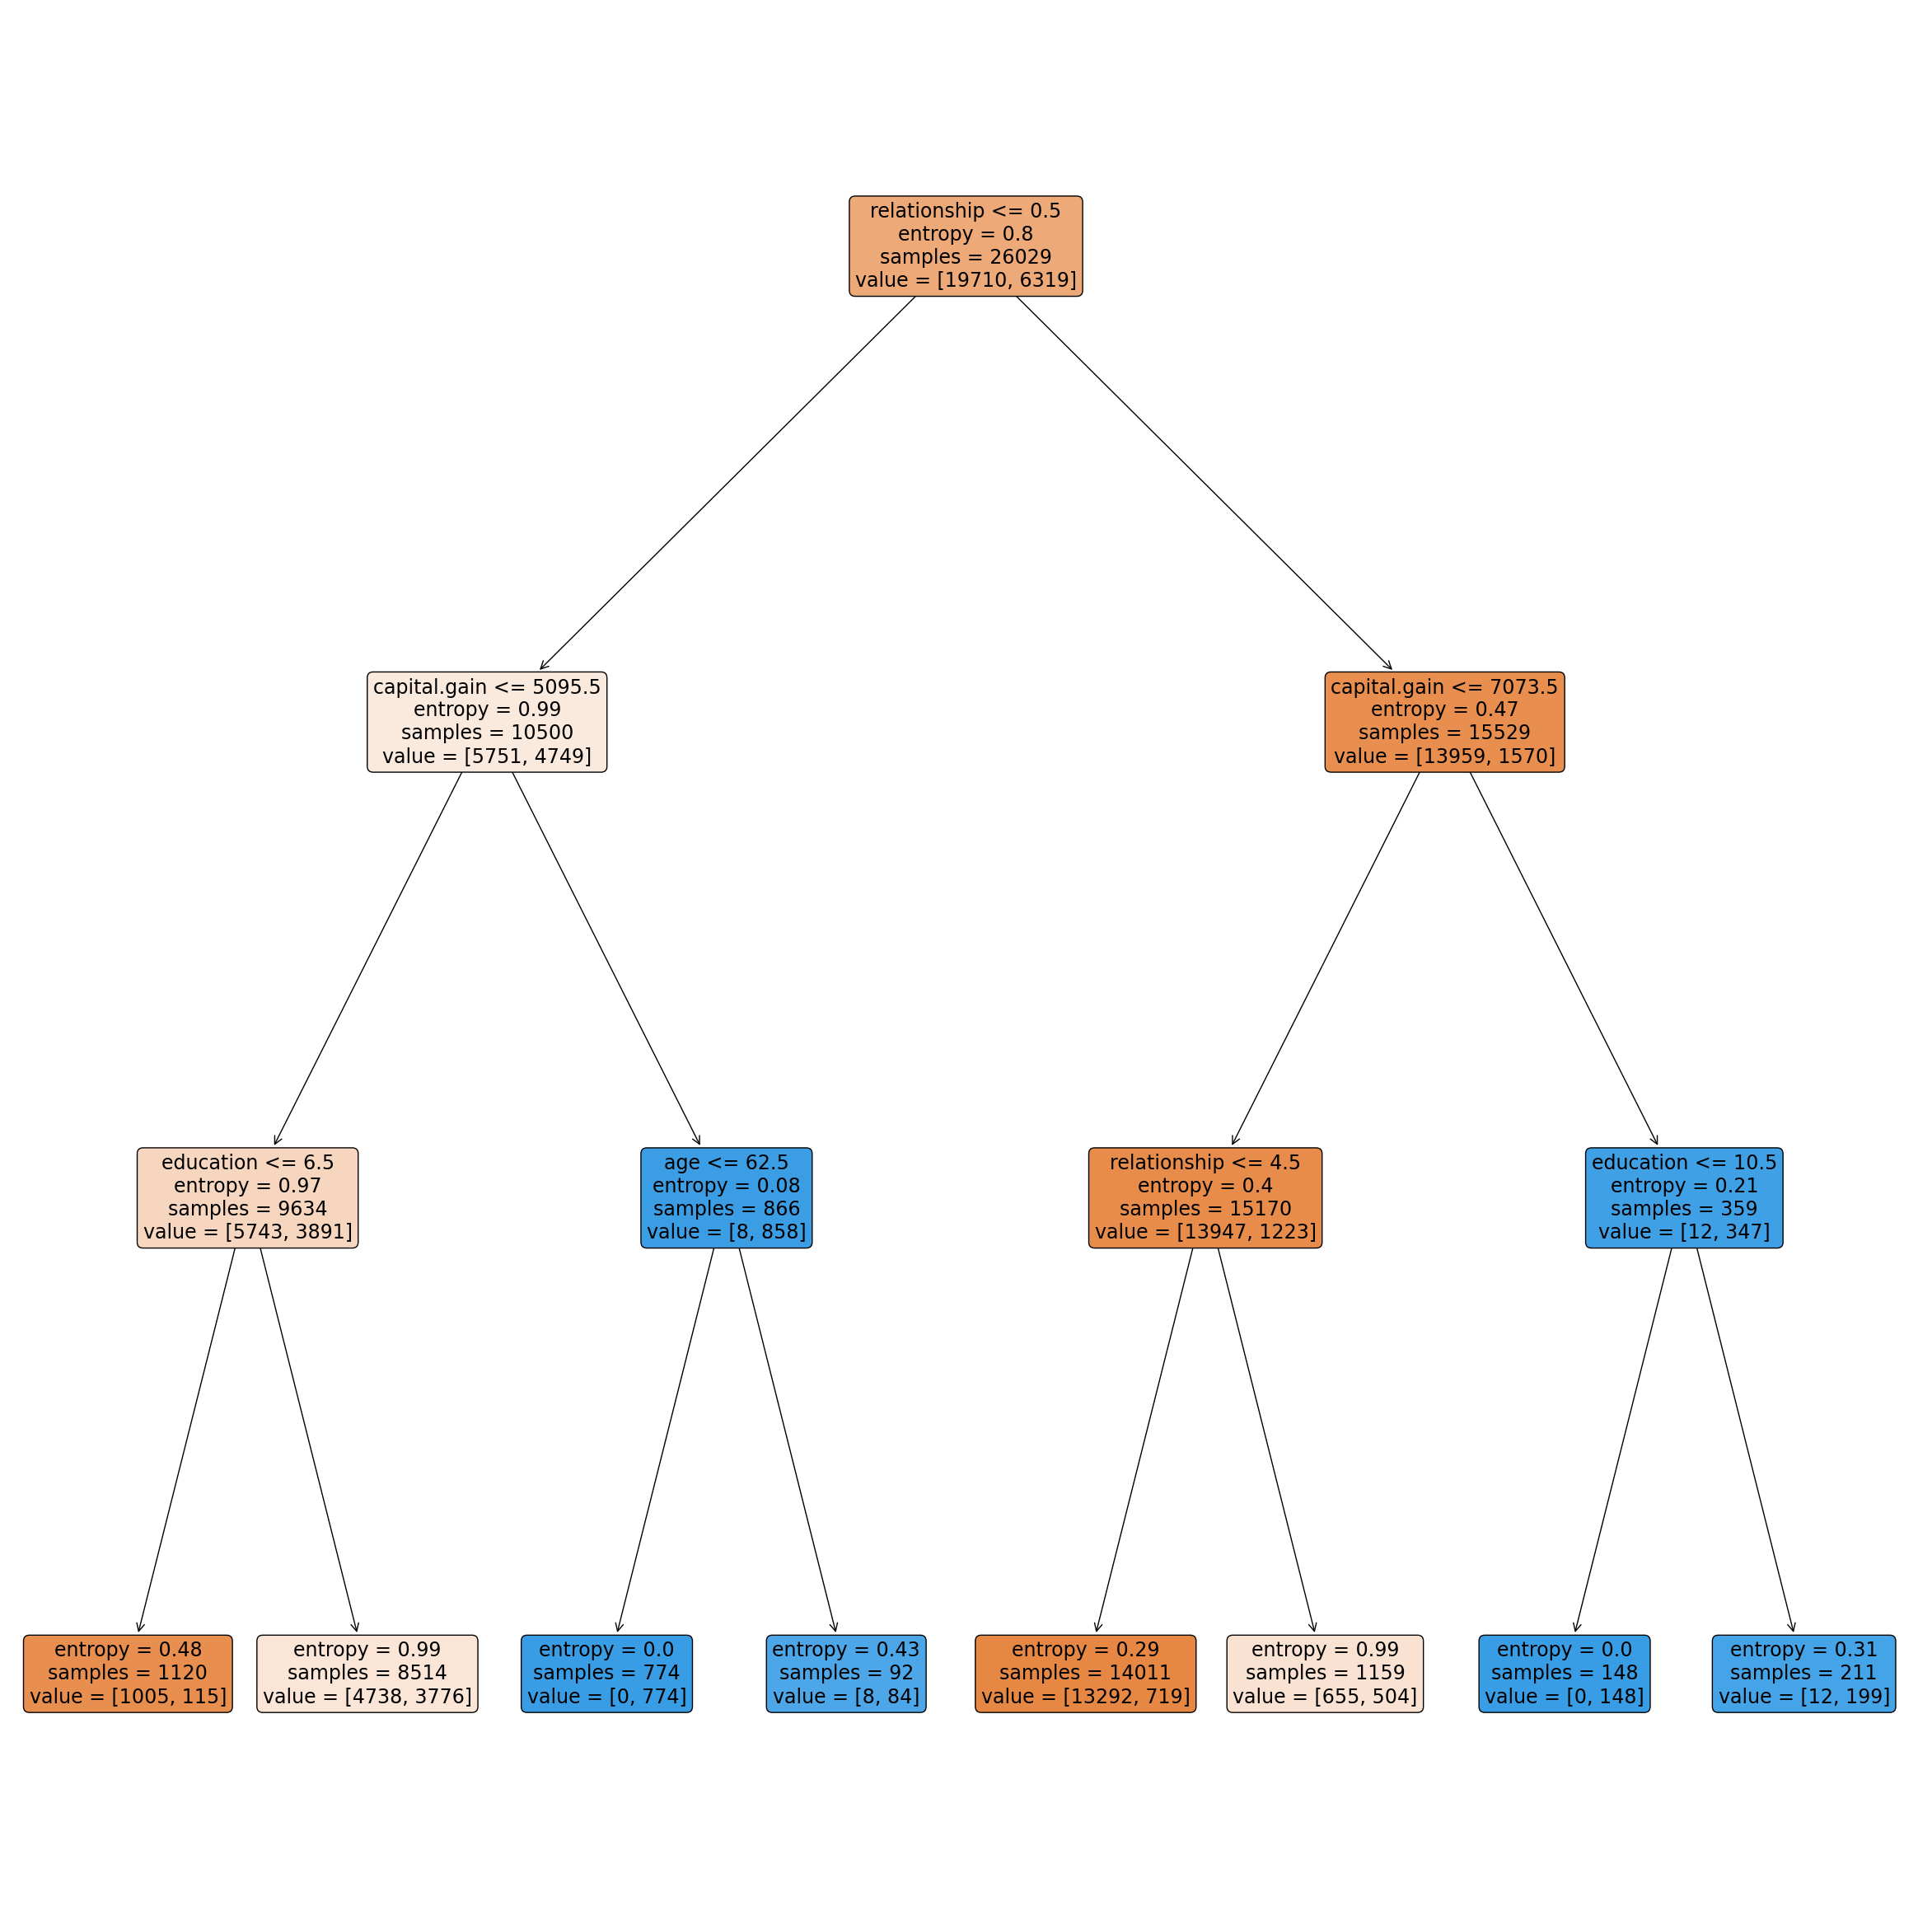

In [24]:
fig,ax = plt.subplots(figsize=(30,30))
plot_tree(tree_clf_income,ax=ax,feature_names=X.columns,
        rounded=True,filled=True,precision=2)
plt.show()

In [25]:
index_rel = np.where(relacionamento_number == 1)
index_educ  = np.where(educacao_number == 10)

NameError: name 'relacionamento_number' is not defined

In [ ]:
educacao.iloc[index_educ]

7        Doctorate
10       Doctorate
14       Doctorate
35       Doctorate
38       Doctorate
           ...    
32443    Doctorate
32476    Doctorate
32477    Doctorate
32535    Doctorate
32541    Doctorate
Name: education, Length: 413, dtype: object

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,tree_clf_income.predict(X_test),target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.80      1.00      0.89      4988
        >50K       0.98      0.18      0.31      1520

    accuracy                           0.81      6508
   macro avg       0.89      0.59      0.60      6508
weighted avg       0.84      0.81      0.75      6508



In [ ]:
accuracy_score(y_test,tree_clf_income.predict(X_test))

0.8082360172095882

In [ ]:
print(adult_df['workclass'].unique())
print(workclass_encoder.transform(adult_df['workclass'].unique()))

['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
[3 6 0 5 4 1 7 2]


In [ ]:
adult_df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [ ]:
relacionamento_encoder.transform(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative','Husband', 'Wife'])

array([1, 4, 3, 2, 0, 5])

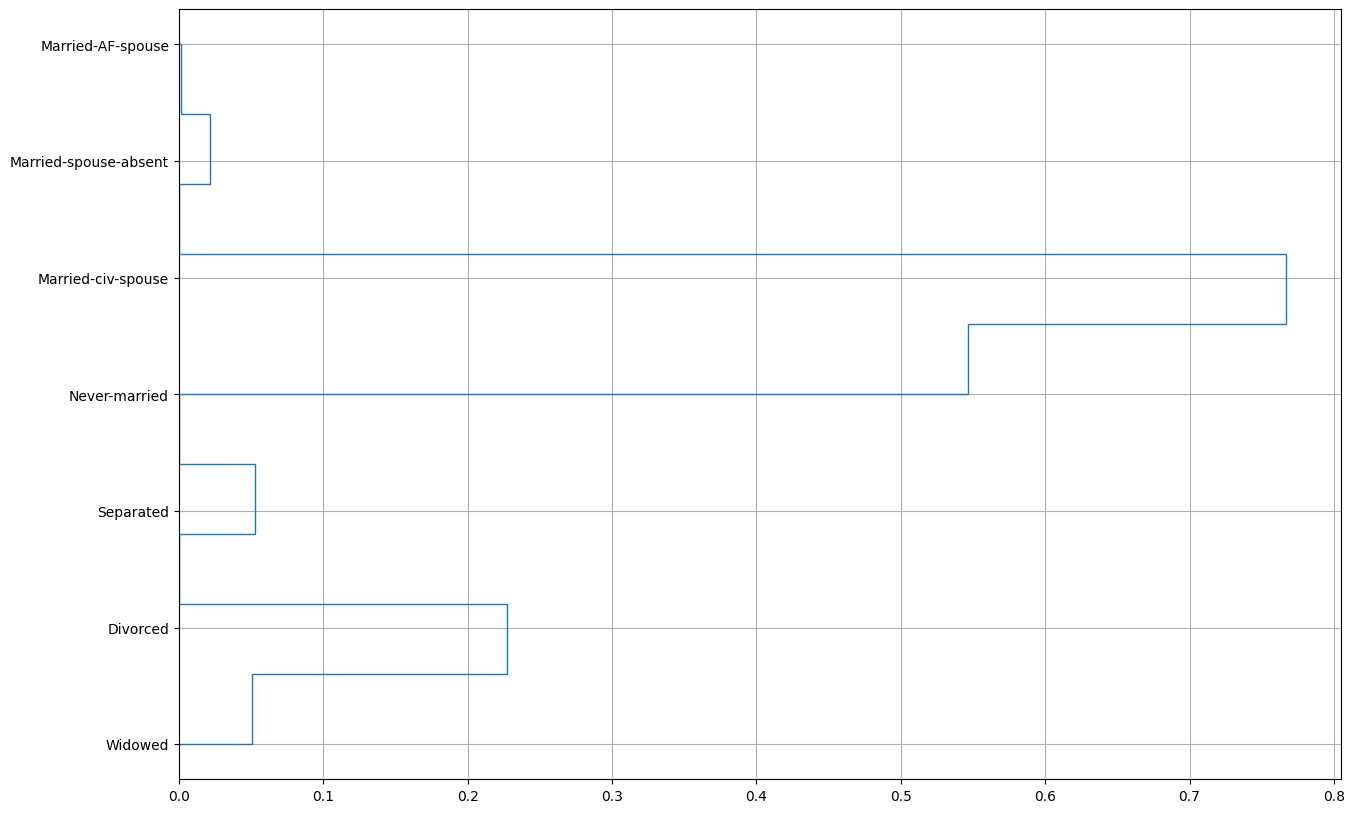

In [ ]:
fig = plt.figure(figsize=(15,10))
adult_df['marital.status'].hist(density=True,histtype='step',orientation='horizontal')
plt.show()

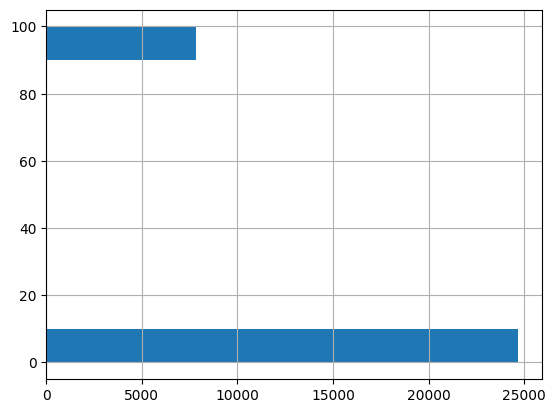

In [27]:
adult_df['income'].hist(orientation='horizontal')
plt.show()